# Exercise 12

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

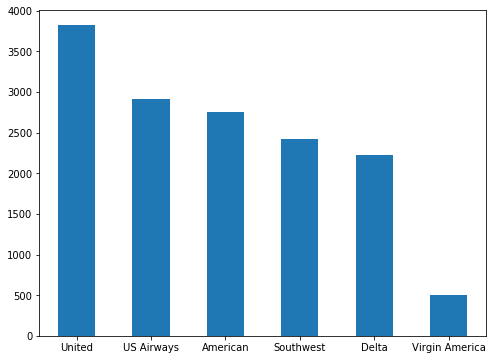

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

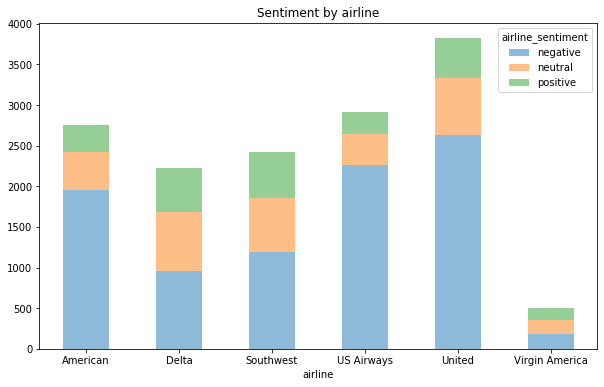

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 12.1 

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [22]:
vect = CountVectorizer()
X_dtmm = vect.fit_transform(X)

In [23]:
pd.Series(cross_val_score(clf, X_dtmm, y, cv=5)).describe()

count    5.000000
mean     0.726298
std      0.027772
min      0.683402
25%      0.716872
50%      0.731216
75%      0.747951
max      0.752049
dtype: float64

#### El primer RandomForest entrenado tiene un Accuracy promedio de 72.6%, utilizando CountVectorizer.

# Exercise 12.2 

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [14]:
vect = CountVectorizer(stop_words='english')
X_dtm = vect.fit_transform(X)

In [33]:
clf = RandomForestClassifier()

In [11]:
pd.Series(cross_val_score(clf, X_dtm, y, cv=5)).describe()

count    5.000000
mean     0.700820
std      0.044952
min      0.635246
25%      0.672473
50%      0.728484
75%      0.730874
max      0.737022
dtype: float64

#### El RandomForest entrenado tiene un Accuracy promedio de 70%, después de remover las Stopwords y utilizando CountVectorizer.

# Exercise 12.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

#### Removing stopwords and n_grams size range (1,4)

In [12]:
vect2 = CountVectorizer(stop_words='english',ngram_range=(1, 4))
X_dtm2 = vect2.fit_transform(X)
X_dtm2.shape

(14640, 292363)

In [13]:
pd.Series(cross_val_score(clf, X_dtm2, y, cv=5)).describe()

count    5.000000
mean     0.706626
std      0.028029
min      0.665984
25%      0.691940
50%      0.717555
75%      0.719604
max      0.738046
dtype: float64

#### El RandomForest entrenado tiene un Accuracy promedio de 70.6%, después de remover las stopwords e incluyendo n_grams de rango (1,4)

#### Without removing stopwords and n_grams size range (1,4)

In [14]:
vect3 = CountVectorizer(ngram_range=(1, 4))
X_dtm3 = vect3.fit_transform(X)
X_dtm3.shape

(14640, 483199)

In [15]:
pd.Series(cross_val_score(clf, X_dtm3, y, cv=5)).describe()

count    5.000000
mean     0.723907
std      0.023485
min      0.687842
25%      0.719262
50%      0.725410
75%      0.735997
max      0.751025
dtype: float64

#### El RandomForest entrenado tiene un Accuracy promedio de 72.3%, sin remover las stopwords e incluyendo n_grams de rango (1,4)

#### Removing stopwords and n_grams size range (1,6)

In [16]:
vect4 = CountVectorizer(stop_words='english',ngram_range=(1, 6))
X_dtm4 = vect4.fit_transform(X)
X_dtm4.shape

(14640, 437310)

In [17]:
pd.Series(cross_val_score(clf, X_dtm4, y, cv=5)).describe()

count    5.000000
mean     0.704713
std      0.031699
min      0.659836
25%      0.684768
50%      0.719945
75%      0.720970
max      0.738046
dtype: float64

#### El RandomForest entrenado tiene un Accuracy promedio de 70.5%, removiendo las stopwords e incluyendo n_grams de rango (1,6)

### Without removing stopwords and n_grams size range (1,6)

In [18]:
vect5 = CountVectorizer(ngram_range=(1, 6))
X_dtm5 = vect5.fit_transform(X)
X_dtm5.shape

(14640, 838076)

In [19]:
pd.Series(cross_val_score(clf, X_dtm5, y, cv=5)).describe()

count    5.000000
mean     0.723292
std      0.022866
min      0.688525
25%      0.716872
50%      0.728142
75%      0.732582
max      0.750342
dtype: float64

#### El RandomForest entrenado tiene un Accuracy promedio de 72.3%, sin remover las stopwords e incluyendo n_grams de rango (1,6)

#### Después de entrenar cuatro modelos con distintas configuraciones se observa que no existe una diferencia significativa en el desempeño de los modelos, pero si hay una diferencia en la carga computacional bastante grande en los modelos entrenados con n_grams, debido a que aumentan el tamaño del set de datos.

# Exercise 12.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [20]:
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(X)

In [21]:
pd.Series(cross_val_score(clf, dtm, y, cv=5)).describe()

count    5.000000
mean     0.696107
std      0.049539
min      0.620560
25%      0.673156
50%      0.713798
75%      0.734973
max      0.738046
dtype: float64

#### El Random Forest entrenado utilizando TfidfVectorizer y removiendo las stopwords tiene un Accuracy de 69.6%.

#### A continuación se entrena un siguiente modelo sin remover las stopwords y utilizando TfidfVectorizer.

In [9]:
vect = TfidfVectorizer()
dtm2 = vect.fit_transform(X)

In [17]:
pd.Series(cross_val_score(clf, dtm2, y, cv=5)).describe()

count    5.000000
mean     0.716120
std      0.022067
min      0.686817
25%      0.701503
50%      0.718579
75%      0.734631
max      0.739071
dtype: float64

#### El Random Forest entrenado utilizando TfidfVectorizer y removiendo las stopwords tiene un Accuracy de 71.6%.

#### A continuación se entrena un siguiente modelo sin remover las stopwords e incluyendo n_grams de rango (1,4)

In [10]:
vect = TfidfVectorizer(ngram_range=(1, 4))
dtm3 = vect.fit_transform(X)

In [34]:
pd.Series(cross_val_score(clf, dtm3, y, cv=5)).describe()

count    5.000000
mean     0.718169
std      0.017574
min      0.694672
25%      0.709699
50%      0.720628
75%      0.723702
max      0.742145
dtype: float64

#### El Random Forest entrenado utilizando TfidfVectorizer y utilizando n_grams de rango (1,4) tiene un Accuracy de 71.8%.

#### Por tanto, para mejorar el acuracy del modelo no solo deberá ser necesario ajustar los parametros del Vectorizar sino también ajustar los parametros del modelo predictivo.

#### Estimación del Random Forest calibrando los parámetros

#### Calibración max_features

In [13]:
feature_range = range(1,7)

accuracy_scores = []

for feature in feature_range:
    clf = RandomForestClassifier(n_estimators=200, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, dtm3, y, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

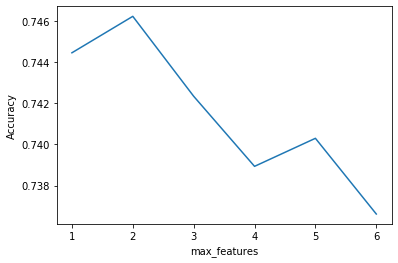

In [14]:
plt.plot(feature_range, accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

#### Calibración n_estimators

In [15]:
estimators = [50,100,150,200]

accuracy_scores = []

for estimator in estimators:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, dtm3, y, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

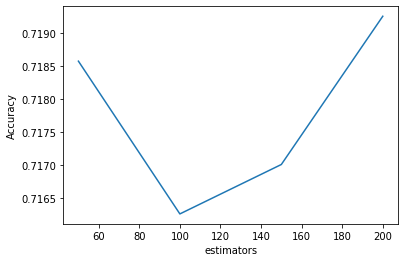

In [16]:
plt.plot(estimators, accuracy_scores)
plt.xlabel('estimators')
plt.ylabel('Accuracy')

#### Random Forest con los mejores parámetros

In [17]:
clf = RandomForestClassifier(n_estimators=200, max_features=2, random_state=1, n_jobs=-1)
cross_val_score(clf, dtm3, y, cv=5, scoring='accuracy').mean()

0.7462431693989071

#### En efecto, podemos observar que ajustar los parametros del Random Forest tiene un impacto en el poder predictivo del modelo utilizando el mismo input usado en el modelo anterior.